# PART- 3 `(Handling With Outliers )`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option(‘display.max_rows’, None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("filled_autoscout.csv")

In [3]:
df.head(2).T

,0,1
body_type,Sedans,Sedans
price_€,15770.000,14500.000
vat,VAT deductible,Price negotiable
km,56013.000,80000.000
hp_kW,66.000,141.000
type,Used,Used
previous_owners,2.000,1.000
warranty,0.000,0.000
make,Audi,Audi
model,A1,A1


# PART- 3 `( Handling With Outliers )`

In [4]:
def detect_outlier(col):
    print('column name : ',col)
    print("--"*20)
    Q1 = df[col].quantile(0.25)
    print("Q1 : ", Q1)
    Q3 = df[col].quantile(0.75)
    print("Q3 : ", Q3)
    IQR = Q3 - Q1
    print("IQR : ", IQR )
    lower_lim = Q1 - 1.5*IQR
    print("lower limit : ", lower_lim)
    print("mean        : ", round(df[col].mean(), 2))
    upper_lim = Q3 +1.5*IQR
    print("upper limit : ", upper_lim)
    cnt_of_lower = (df[col] < lower_lim).sum()
    print("count of lower values : ", cnt_of_lower)
    cnt_of_upper = (df[col] > upper_lim).sum()
    print("count of upper values : ", cnt_of_upper)
    print(" ")
    print("the smallest 10 values :\n", df[col].sort_values().head(10))
    print(" ")
    print("the biggest 10 values :\n", df[col].sort_values(ascending = False).head(10))
    
    print("\n\n")

In [5]:
for i in df.select_dtypes(exclude="O").columns:
    detect_outlier(i)

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
lower limit :  -725.0
mean        :  18019.9
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594      13.000
8828     120.000
6066     255.000
8829     331.000
8827    4950.000
8825    4990.000
8826    5250.000
8824    5300.000
13770   5445.000
8823    5450.000
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648    74600.000
15826   68320.000
3649    67600.000
3587    64900.000
15828   64332.000
15831   64298.000
3595    63900.000
15833   63477.000
3590    62900.000
3594    58990.000
Name: price_€, dtype: float64



column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
lower limit :  -65347.75
mean        :  31964.85
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518   0.000
9892    0.000
2496    0.000
9

# **1.price_€**

In [6]:
detect_outlier("price_€")

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
lower limit :  -725.0
mean        :  18019.9
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594      13.000
8828     120.000
6066     255.000
8829     331.000
8827    4950.000
8825    4990.000
8826    5250.000
8824    5300.000
13770   5445.000
8823    5450.000
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648    74600.000
15826   68320.000
3649    67600.000
3587    64900.000
15828   64332.000
15831   64298.000
3595    63900.000
15833   63477.000
3590    62900.000
3594    58990.000
Name: price_€, dtype: float64





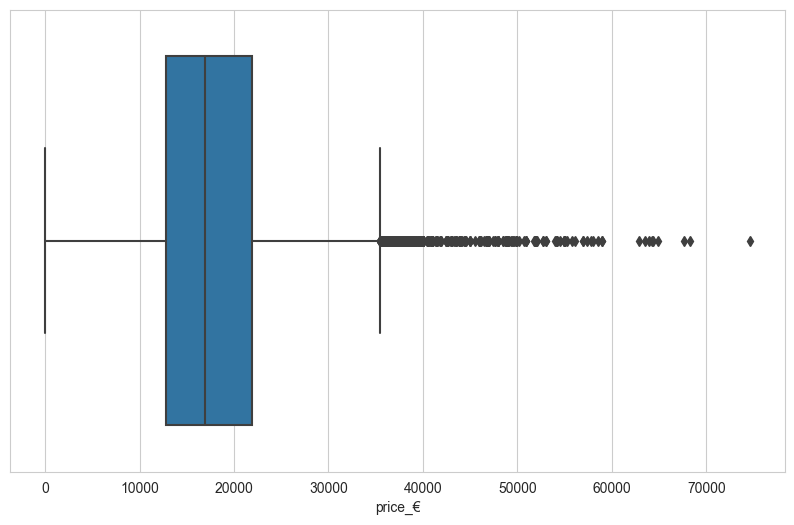

In [7]:
sns.boxplot(x="price_€", data=df);

In [8]:
# Lower values 0 çıkmasına rağmen ilk 4 değer çok küçük görünüyor. 
# Bu değerlerin outlier olduğunu tespit ettik.
# Upper values 479 çıktı fakat price_€ column kendi içinde değerlendirildiğinde bu fiyatlara outlier demek mantıklı olmayacaktır,
# Araçların özelliklerine göre fiyatlar bu seviyelere kadar artabilir.

In [9]:
df.iloc[[8594, 8828, 6066, 8829]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
8594,Sedans,13.000,VAT deductible,123.000,66.000,Used,1.000,0.000,Opel,Corsa,Gold,Metallic,Cloth,3.000,5.000,Manual,1398.000,4.000,1141.000,front,Benzine,128.000,Euro 6d-TEMP,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive headlights,Central door lock with...",5.000,Unknown,5.600,6.800,4.900,1.000
8828,Compact,120.000,VAT deductible,12.000,66.000,New,0.000,0.000,Opel,Corsa,Grey,Metallic,Cloth,5.000,5.000,Manual,999.000,3.000,1099.000,front,Benzine,107.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Digital radio,On-board computer,Radio","Alloy wheels,Sport suspension","Central door lock,Daytime running lights,Drive...",6.000,Netherlands,4.600,5.600,4.100,0.000
6066,Station wagon,255.000,VAT deductible,5563.000,100.000,Used,1.000,0.000,Opel,Astra,Gold,Metallic,Cloth,5.000,5.000,Manual,1598.000,4.000,1403.000,front,Diesel,101.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Roof rack,"ABS,Central door lock with remote control,Dayt...",6.000,Unknown,3.800,4.500,3.400,1.000
8829,Other,331.000,VAT deductible,10.000,66.000,New,0.000,0.000,Opel,Corsa,White,Metallic,Cloth,5.000,5.000,Manual,999.000,3.000,1163.000,front,Benzine,128.000,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio","Alloy wheels,Sport package","ABS,Central door lock,Driver-side airbag,Elect...",6.000,Netherlands,6.650,8.200,5.700,0.000


In [10]:
# df.loc[df["price_€"] < 400,  ["price_€"]] = np.nan 
# it's the same code below

In [11]:
df["price_€"] = df["price_€"].apply(lambda x: np.nan if x < 400 else x)

In [12]:
df["price_€"] = df.groupby(["make", "model", "body_type", "age"])["price_€"].apply(lambda x : x.fillna(round(x.mean(),2)))

In [13]:
df.iloc[[8594, 8828, 6066, 8829]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
8594,Sedans,10853.410,VAT deductible,123.000,66.000,Used,1.000,0.000,Opel,Corsa,Gold,Metallic,Cloth,3.000,5.000,Manual,1398.000,4.000,1141.000,front,Benzine,128.000,Euro 6d-TEMP,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive headlights,Central door lock with...",5.000,Unknown,5.600,6.800,4.900,1.000
8828,Compact,13816.200,VAT deductible,12.000,66.000,New,0.000,0.000,Opel,Corsa,Grey,Metallic,Cloth,5.000,5.000,Manual,999.000,3.000,1099.000,front,Benzine,107.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Digital radio,On-board computer,Radio","Alloy wheels,Sport suspension","Central door lock,Daytime running lights,Drive...",6.000,Netherlands,4.600,5.600,4.100,0.000
6066,Station wagon,16932.860,VAT deductible,5563.000,100.000,Used,1.000,0.000,Opel,Astra,Gold,Metallic,Cloth,5.000,5.000,Manual,1598.000,4.000,1403.000,front,Diesel,101.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Roof rack,"ABS,Central door lock with remote control,Dayt...",6.000,Unknown,3.800,4.500,3.400,1.000
8829,Other,12310.360,VAT deductible,10.000,66.000,New,0.000,0.000,Opel,Corsa,White,Metallic,Cloth,5.000,5.000,Manual,999.000,3.000,1163.000,front,Benzine,128.000,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio","Alloy wheels,Sport package","ABS,Central door lock,Driver-side airbag,Elect...",6.000,Netherlands,6.650,8.200,5.700,0.000


# **2.km**

In [14]:
detect_outlier("km")

column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
lower limit :  -65347.75
mean        :  31964.85
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518   0.000
9892    0.000
2496    0.000
9882    0.000
15668   0.000
5553    0.000
12512   0.000
5672    0.000
9929    0.000
7828    0.000
Name: km, dtype: float64
 
the biggest 10 values :
 9279    317000.000
3003    291800.000
5712    260000.000
6224    248000.000
15277   240000.000
10804   232000.000
6380    231879.000
6062    230928.000
6399    229500.000
10495   222346.000
Name: km, dtype: float64





In [15]:
# nothing done.

# **3.hp_kW**

In [16]:
detect_outlier("hp_kW")

column name :  hp_kW
----------------------------------------
Q1 :  66.0
Q3 :  101.0
IQR :  35.0
lower limit :  13.5
mean        :  88.37
upper limit :  153.5
count of lower values :  22
count of upper values :  406
 
the smallest 10 values :
 6034   1.000
7019   1.000
7014   1.000
9285   1.000
6005   1.000
9287   1.000
9288   1.000
7018   1.000
9289   1.000
9290   1.000
Name: hp_kW, dtype: float64
 
the biggest 10 values :
 3595   294.000
3606   294.000
3587   294.000
3590   294.000
3592   294.000
3593   294.000
3596   294.000
3598   294.000
3599   294.000
3600   294.000
Name: hp_kW, dtype: float64





In [17]:
df.loc[df["hp_kW"].sort_values(ascending=True).head(50).index]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
6034,Station wagon,11600.000,VAT deductible,76010.000,1.000,Used,1.000,0.000,Opel,Astra,Silver,Metallic,Cloth,5.000,5.000,Automatic,998.000,4.000,1393.000,front,Benzine,125.000,Euro 6,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB","Catalytic Converter,Roof rack,Touch screen","Alarm system,Central door lock,Driver-side air...",6.000,Unknown,6.440,8.300,5.300,2.000
7019,Sedans,11700.000,VAT deductible,69035.000,1.000,Used,1.000,0.000,Opel,Astra,Black,Metallic,Other,5.000,5.000,Manual,1364.000,4.000,1308.000,front,Benzine,125.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.000,Unknown,5.378,7.300,4.200,2.000
7014,Sedans,11700.000,VAT deductible,79993.000,1.000,Used,1.000,0.000,Opel,Astra,Silver,Metallic,Other,5.000,5.000,Manual,1364.000,4.000,1308.000,front,Benzine,125.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.000,Unknown,5.378,7.300,4.200,2.000
9285,Sedans,8300.000,Price negotiable,58912.000,1.000,Used,1.000,0.000,Opel,Corsa,Black,Metallic,Cloth,5.000,5.000,Manual,1229.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.000,Unknown,5.398,6.700,4.600,2.000
6005,Station wagon,11600.000,VAT deductible,73860.000,1.000,Used,1.000,0.000,Opel,Astra,Black,Metallic,Cloth,5.000,5.000,Automatic,998.000,4.000,1393.000,front,Benzine,125.000,Euro 6,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB",Roof rack,"Alarm system,Central door lock,Driver-side air...",6.000,Unknown,6.440,8.300,5.300,2.000
9287,Sedans,8300.000,Price negotiable,53522.000,1.000,Used,1.000,0.000,Opel,Corsa,Silver,Metallic,Cloth,5.000,5.000,Manual,1229.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.000,Unknown,5.398,6.700,4.600,2.000
9288,Sedans,8300.000,Price negotiable,60386.000,1.000,Used,1.000,0.000,Opel,Corsa,Silver,Metallic,Cloth,5.000,5.000,Manual,1229.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.000,Unknown,5.398,6.700,4.600,2.000
7018,Sedans,11700.000,VAT deductible,77272.000,1.000,Used,1.000,0.000,Opel,Astra,Black,Metallic,Other,5.000,5.000,Manual,1364.000,4.000,1308.000,front,Benzine,125.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.000,Unknown,5.378,7.300,4.200,2.000
9289,Sedans,8300.000,Price negotiable,59217.000,1.000,Used,1.000,0.000,Opel,Corsa,Silver,Metallic,Cloth,5.000,5.000,Manual,1229.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.000,Unknown,5.398,6.700,4.600,2.000
9290,Sedans,8300.000,Price negotiable,51318.000,1.000,Used,1.000,0.000,Opel,Corsa,Silver,Metallic,Cloth,5.000,5.000,Manual,1229.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",All

In [18]:
df.loc[df["hp_kW"].sort_values(ascending=False).head(50).index]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
3595,Station wagon,63900.000,VAT deductible,10.000,294.000,Used,1.000,1.000,Audi,A3,Black,Metallic,Part leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Ski bag,Sport packa...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,Italy,8.300,11.300,6.600,0.000
3606,Sedans,49900.000,VAT deductible,17234.000,294.000,Used,1.000,0.000,Audi,A3,Black,Metallic,Part leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,1.000
3587,Sedans,64900.000,VAT deductible,35000.000,294.000,Used,1.000,0.000,Audi,A3,Grey,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,1.000
3590,Sedans,62900.000,VAT deductible,700.000,294.000,Used,1.000,0.000,Audi,A3,Grey,Metallic,Part leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,194.000,Euro 6d-TEMP,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",7.000,Unknown,8.300,11.300,6.600,0.000
3592,Sedans,56900.000,VAT deductible,5200.000,294.000,Used,1.000,0.000,Audi,A3,Grey,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,4WD,Benzine,189.000,Euro 6,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,Italy,8.300,11.300,6.600,1.000
3593,Sedans,58500.000,VAT deductible,10000.000,294.000,Used,1.000,0.000,Audi,A3,White,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,1.000
3596,Sedans,57400.000,Price negotiable,63000.000,294.000,Used,1.000,0.000,Audi,A3,Blue,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,4WD,Benzine,189.000,Euro 6,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Sport suspension,Tune...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,Unknown,8.300,11.300,6.600,1.000
3598,Sedans,55000.000,VAT deductible,24000.000,294.000,Used,1.000,0.000,Audi,A3,Black,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,2.000
3599,Sedans,55000.000,VAT deductible,30000.000,294.000,Used,1.000,0.000,Audi,A3,Grey,Metallic,Full leather,4.000,5.000,Semi-automatic,2480.000,5.000,1590.000,front,Benzine,188.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.500,1.000
3600,Sedans,53000.000,VAT deductible,4000.000,294.000,Used,1.000,0.000,Audi,A3,Black,Metallic,Full leather,4.000,5.000,Semi-automatic,2480.000,5.000,1590.000,front,Benzine,188.000,Euro 6,"Air conditioning,Air suspension

In [19]:
df.groupby(["make", "model", "body_type"])["hp_kW"].mean()

make     model     body_type    
Audi     A1        Compact          77.078
                   Coupe            77.500
                   Other            80.385
                   Sedans           76.322
                   Station wagon    75.143
                   Van             147.000
         A2        Off-Road         85.000
         A3        Compact          89.945
                   Convertible     124.250
                   Coupe            82.000
                   Other            88.188
                   Sedans           90.077
                   Station wagon    90.681
Opel     Astra     Compact          87.849
                   Coupe           106.500
                   Off-Road        110.000
                   Other            86.403
                   Sedans           90.335
                   Station wagon    95.689
         Corsa     Compact          61.700
                   Coupe            59.462
                   Off-Road         68.667
                   Ot

In [20]:
df[df["hp_kW"] < 33.0][["make", "model"]].value_counts()

make     model   
Opel     Astra       7
         Corsa       7
         Insignia    4
Renault  Espace      2
Audi     A3          1
Renault  Clio        1
dtype: int64

In [21]:
df[df["hp_kW"] > 195][["make", "model"]].value_counts()

make  model   
Audi  A3          22
Opel  Insignia     1
dtype: int64

In [22]:
def detect_values(col, col2):
    my_list = df[col].unique()
    for i in my_list:
        a = df[df[col] == i][col2].max()
        b = df[df[col] == i][col2].min()
        c = df[df[col] == i][col2].mean()
        print(f"{i} max : {a}   min : {b}   mean : {c}")

In [23]:
detect_values("make", "hp_kW")

Audi max : 294.0   min : 9.0   mean : 83.99929971988796
Opel max : 239.0   min : 1.0   mean : 90.53247991284216
Renault max : 168.0   min : 1.0   mean : 91.55586592178771


In [24]:
df["hp_kW"] = df["hp_kW"].apply(lambda x: np.nan if x < 33 else x)

In [25]:
df.groupby(["make", "model", "drive_chain", "engine_displacement_cc"])["hp_kW"].apply(lambda x : x.fillna(x.median() if x.median() > 1 else df["hp_kW"].median())).value_counts(dropna=False)

85.000     2546
66.000     2124
81.000     1405
100.000    1313
110.000    1112
           ... 
44.000        1
75.000        1
123.000       1
239.000       1
137.000       1
Name: hp_kW, Length: 78, dtype: int64

In [26]:
df["hp_kW"] = df.groupby(["make", "model", "drive_chain", "engine_displacement_cc"])["hp_kW"].apply(lambda x : x.fillna(x.median() if x.median() > 1 else df["hp_kW"].median()))

# **4.previous_owners**

In [27]:
detect_outlier("previous_owners")

column name :  previous_owners
----------------------------------------
Q1 :  1.0
Q3 :  1.0
IQR :  0.0
lower limit :  1.0
mean        :  0.95
upper limit :  1.0
count of lower values :  1659
count of upper values :  797
 
the smallest 10 values :
 2295    0.000
1697    0.000
12697   0.000
12696   0.000
12694   0.000
12693   0.000
12692   0.000
12691   0.000
12690   0.000
12689   0.000
Name: previous_owners, dtype: float64
 
the biggest 10 values :
 15256   4.000
972     4.000
14994   3.000
9478    3.000
10770   3.000
13560   3.000
1290    3.000
11443   3.000
13568   3.000
15007   3.000
Name: previous_owners, dtype: float64





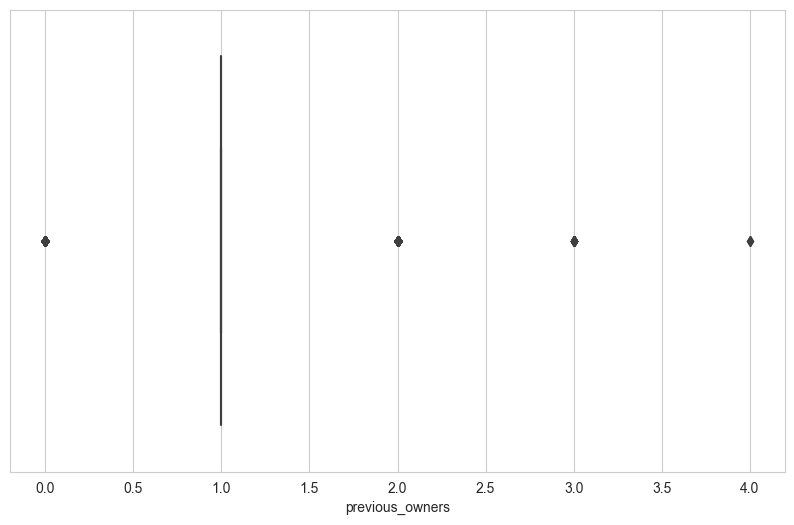

In [28]:
sns.boxplot(x=df.previous_owners);

In [29]:
# nothing done.

# **5.warranty**

In [30]:
detect_outlier("warranty")

column name :  warranty
----------------------------------------
Q1 :  0.0
Q3 :  1.0
IQR :  1.0
lower limit :  -1.5
mean        :  0.3
upper limit :  2.5
count of lower values :  0
count of upper values :  0
 
the smallest 10 values :
 0      0.000
9659   0.000
9660   0.000
9661   0.000
9662   0.000
9663   0.000
9664   0.000
9665   0.000
9666   0.000
9667   0.000
Name: warranty, dtype: float64
 
the biggest 10 values :
 7959    1.000
12349   1.000
5174    1.000
5173    1.000
5171    1.000
5169    1.000
12343   1.000
5166    1.000
12346   1.000
5161    1.000
Name: warranty, dtype: float64





In [31]:
# garantisi olanlar 1 olmayanlar 0 atanacak daha sonra.

# **6.nr_of_doors**

In [32]:
detect_outlier("nr_of_doors")

column name :  nr_of_doors
----------------------------------------
Q1 :  4.0
Q3 :  5.0
IQR :  1.0
lower limit :  2.5
mean        :  4.66
upper limit :  6.5
count of lower values :  220
count of upper values :  1
 
the smallest 10 values :
 13782   1.000
1811    2.000
1228    2.000
1229    2.000
1230    2.000
1231    2.000
303     2.000
1233    2.000
1234    2.000
1235    2.000
Name: nr_of_doors, dtype: float64
 
the biggest 10 values :
 15202   7.000
0       5.000
10023   5.000
10012   5.000
10013   5.000
10014   5.000
10015   5.000
10016   5.000
10017   5.000
10018   5.000
Name: nr_of_doors, dtype: float64





In [33]:
df[df["nr_of_doors"] == 2][["make", "model", "body_type"]].value_counts()

make  model  body_type    
Opel  Corsa  Compact          88
Audi  A1     Compact          69
             Sedans           29
      A3     Sedans           17
             Convertible       7
Opel  Corsa  Sedans            4
Audi  A3     Other             2
      A1     Coupe             1
      A3     Station wagon     1
Opel  Corsa  Other             1
dtype: int64

In [34]:
df.loc[(df.nr_of_doors == 1) | (df.nr_of_doors == 7), "nr_of_doors"] = 5

# **7.nr_of_seats**

In [35]:
detect_outlier("nr_of_seats")

column name :  nr_of_seats
----------------------------------------
Q1 :  5.0
Q3 :  5.0
IQR :  0.0
lower limit :  5.0
mean        :  4.95
upper limit :  5.0
count of lower values :  1242
count of upper values :  364
 
the smallest 10 values :
 14555   2.000
13931   2.000
13618   2.000
13743   2.000
13929   2.000
13617   2.000
13616   2.000
13749   2.000
13750   2.000
13619   2.000
Name: nr_of_seats, dtype: float64
 
the biggest 10 values :
 15125   7.000
15274   7.000
15010   7.000
15011   7.000
15012   7.000
15656   7.000
15657   7.000
15013   7.000
15014   7.000
15660   7.000
Name: nr_of_seats, dtype: float64





In [36]:
df[df["nr_of_seats"] == 7][["make", "model", "body_type"]].value_counts()

make     model   body_type    
Renault  Espace  Van              315
                 Station wagon     19
                 Transporter       16
                 Sedans             4
                 Off-Road           3
                 Other              3
                 Compact            2
dtype: int64

In [37]:
df[df["nr_of_seats"] == 2][["make", "model", "body_type"]].value_counts()

make     model     body_type    
Renault  Clio      Sedans           71
                   Transporter      26
                   Compact           8
Opel     Corsa     Transporter       4
Renault  Clio      Other             4
Opel     Corsa     Coupe             1
         Insignia  Station wagon     1
Renault  Clio      Van               1
dtype: int64

In [38]:
# nothing done.

# **8.engine_displacement_cc**

In [39]:
detect_outlier("engine_displacement_cc")

column name :  engine_displacement_cc
----------------------------------------
Q1 :  1229.0
Q3 :  1598.0
IQR :  369.0
lower limit :  675.5
mean        :  1424.82
upper limit :  2151.5
count of lower values :  51
count of upper values :  23
 
the smallest 10 values :
 14315   1.000
12473   1.000
12484   1.000
14328   1.000
14327   1.000
14326   1.000
13904   1.000
14325   1.000
14324   1.000
14322   1.000
Name: engine_displacement_cc, dtype: float64
 
the biggest 10 values :
 10932   16000.000
7169    15898.000
10771    2967.000
3609     2480.000
3604     2480.000
3602     2480.000
3601     2480.000
3600     2480.000
3599     2480.000
3598     2480.000
Name: engine_displacement_cc, dtype: float64





In [40]:
df.loc[df["engine_displacement_cc"] > 3000.0, "engine_displacement_cc"] = 1600.0

In [41]:
df.iloc[[10932, 7169]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
10932,Station wagon,14300.000,Price negotiable,76500.000,88.000,Used,1.000,0.000,Opel,Insignia,Grey,Metallic,Full leather,5.000,5.000,Manual,1600.000,4.000,1623.000,front,Diesel,135.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,Unknown,4.500,5.700,3.765,3.000
7169,Station wagon,18490.000,VAT deductible,22327.000,100.000,Employee's car,1.000,0.000,Opel,Astra,Green,Metallic,Cloth,5.000,5.000,Automatic,1600.000,4.000,1393.000,front,Benzine,119.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,Unknown,4.500,5.700,3.800,1.000


In [42]:
df.iloc[df["engine_displacement_cc"].sort_values().head(60).index]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
14315,Sedans,9999.000,VAT deductible,8031.000,54.000,Used,1.000,0.000,Renault,Clio,White,Metallic,Cloth,5.000,5.000,Manual,1.000,4.000,1162.000,front,Benzine,120.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...",USB,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,Unknown,5.650,7.200,4.700,1.000
12473,Station wagon,34490.000,VAT deductible,3373.868,100.000,Demonstration,1.000,0.000,Opel,Insignia,Silver,Metallic,Part leather,5.000,5.000,Automatic,1.000,4.000,1623.000,front,Diesel,135.000,Euro 6,"Air conditioning,Automatic climate control,Cru...",Bluetooth,"Alloy wheels,Roof rack,Sport package,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.000,Unknown,7.120,9.600,5.600,0.000
12484,Sedans,33990.000,VAT deductible,10.000,100.000,Demonstration,1.000,0.000,Opel,Insignia,Black,Metallic,Part leather,5.000,5.000,Automatic,1.000,4.000,1503.000,front,Diesel,135.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",6.000,Unknown,7.120,9.600,5.600,0.000
14328,Sedans,9999.000,VAT deductible,17364.000,54.000,Used,1.000,0.000,Renault,Clio,White,Metallic,Cloth,5.000,5.000,Manual,1.000,4.000,1162.000,front,Benzine,120.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...",USB,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,Unknown,5.650,7.200,4.700,1.000
14327,Sedans,9999.000,VAT deductible,21543.000,54.000,Used,1.000,0.000,Renault,Clio,White,Metallic,Cloth,5.000,5.000,Manual,1.000,4.000,1162.000,front,Benzine,120.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...",USB,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,Unknown,5.650,7.200,4.700,1.000
14326,Sedans,9999.000,VAT deductible,14066.000,54.000,Used,1.000,0.000,Renault,Clio,White,Metallic,Cloth,5.000,5.000,Manual,1.000,4.000,1162.000,front,Benzine,120.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...",USB,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,Unknown,5.650,7.200,4.700,1.000
13904,Sedans,9490.000,VAT deductible,26000.000,54.000,Used,1.000,0.000,Renault,Clio,White,Metallic,Cloth,5.000,5.000,Manual,1.000,4.000,1162.000,front,Benzine,120.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...",USB,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,Unknown,5.650,7.200,4.700,2.000
14325,Sedans,9999.000,VAT deductible,14532.000,54.000,Used,1.000,0.000,Renault,Clio,White,Metallic,Cloth,5.000,5.000,Manual,1.000,4.000,1162.000,front,Benzine,120.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...",USB,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,Unknown,5.650,7.200,4.700,1.000
14324,Sedans,9999.000,VAT deductible,30000.000,54.000,Used,1.000,0.000,Renault,Clio,White,Metallic,Cloth,5.000,5.000,Manual,1.000,4.000,1162.000,front,Benzine,120.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...",USB,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,Unknown,5.650,7.200,4.700,1.000
14322,Sedans,9999.000,VAT deductible,15678.000,54.000,Used,1.000,0.000,Renault,Clio,White,Metallic,Cloth,5.000,5.000,Manual,1.000,4.000,1162.000,front,Benzine,120.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...",USB,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,Unknown,5.650,7.200,4.700,1.000


In [43]:
df.loc[(df.engine_displacement_cc < 800), "engine_displacement_cc"] = np.nan

In [44]:
df.groupby(["make", "model","cylinders", "hp_kW"])["engine_displacement_cc"].apply(lambda x : x.fillna(x.median()) if x.median() > 0 else df["engine_displacement_cc"].median())

0       1422.000
1       1798.000
2       1598.000
3       1422.000
4       1422.000
          ...   
15914   1997.000
15915   1798.000
15916   1997.000
15917   1997.000
15918   1798.000
Name: engine_displacement_cc, Length: 15919, dtype: float64

In [45]:
df["engine_displacement_cc"] = df.groupby(["make", "model","cylinders", "hp_kW"])["engine_displacement_cc"].apply(lambda x : x.fillna(x.median()) if x.median() > 0 else df["engine_displacement_cc"].median())

In [46]:
detect_outlier("engine_displacement_cc")

column name :  engine_displacement_cc
----------------------------------------
Q1 :  1229.0
Q3 :  1598.0
IQR :  369.0
lower limit :  675.5
mean        :  1427.57
upper limit :  2151.5
count of lower values :  0
count of upper values :  21
 
the smallest 10 values :
 13653   890.000
14706   898.000
14707   898.000
14708   898.000
14494   898.000
14709   898.000
14710   898.000
14711   898.000
14712   898.000
14713   898.000
Name: engine_displacement_cc, dtype: float64
 
the biggest 10 values :
 10771   2967.000
3587    2480.000
3596    2480.000
3592    2480.000
3593    2480.000
3609    2480.000
3608    2480.000
3595    2480.000
3598    2480.000
3610    2480.000
Name: engine_displacement_cc, dtype: float64





In [47]:
df.loc[df.engine_displacement_cc > 2500, "engine_displacement_cc" ] = 3.0
df.loc[df.engine_displacement_cc > 2000, "engine_displacement_cc" ] = 2.5
df.loc[df.engine_displacement_cc > 1800, "engine_displacement_cc" ] = 2.0
df.loc[df.engine_displacement_cc > 1600, "engine_displacement_cc" ] = 1.8
df.loc[df.engine_displacement_cc > 1500, "engine_displacement_cc" ] = 1.6
df.loc[df.engine_displacement_cc > 1400, "engine_displacement_cc" ] = 1.5
df.loc[df.engine_displacement_cc > 1300, "engine_displacement_cc" ] = 1.4
df.loc[df.engine_displacement_cc > 1200, "engine_displacement_cc" ] = 1.3
df.loc[df.engine_displacement_cc > 1100, "engine_displacement_cc" ] = 1.2
df.loc[df.engine_displacement_cc > 800, "engine_displacement_cc" ] = 1.0

In [48]:
detect_outlier("engine_displacement_cc")

column name :  engine_displacement_cc
----------------------------------------
Q1 :  1.3
Q3 :  1.6
IQR :  0.30000000000000004
lower limit :  0.85
mean        :  1.45
upper limit :  2.0500000000000003
count of lower values :  0
count of upper values :  21
 
the smallest 10 values :
 7959   1.000
2391   1.000
2392   1.000
2393   1.000
2394   1.000
2395   1.000
2396   1.000
2397   1.000
2398   1.000
2399   1.000
Name: engine_displacement_cc, dtype: float64
 
the biggest 10 values :
 10771   3.000
3601    2.500
3606    2.500
3605    2.500
3604    2.500
3608    2.500
3603    2.500
3609    2.500
3587    2.500
3649    2.500
Name: engine_displacement_cc, dtype: float64





# **9.cylinders**

In [49]:
detect_outlier("cylinders")

column name :  cylinders
----------------------------------------
Q1 :  4.0
Q3 :  4.0
IQR :  0.0
lower limit :  4.0
mean        :  3.79
upper limit :  4.0
count of lower values :  3328
count of upper values :  32
 
the smallest 10 values :
 9956    1.000
15835   2.000
11342   2.000
0       3.000
2544    3.000
2545    3.000
2546    3.000
2547    3.000
2548    3.000
2549    3.000
Name: cylinders, dtype: float64
 
the biggest 10 values :
 15151   8.000
15197   8.000
15186   8.000
14989   8.000
535     8.000
15165   8.000
15055   8.000
10771   6.000
10826   6.000
12897   6.000
Name: cylinders, dtype: float64





In [50]:
df.loc[(df.cylinders == 1) | (df.cylinders==2), "cylinders"] = 4

In [51]:
detect_outlier("cylinders")

column name :  cylinders
----------------------------------------
Q1 :  4.0
Q3 :  4.0
IQR :  0.0
lower limit :  4.0
mean        :  3.79
upper limit :  4.0
count of lower values :  3325
count of upper values :  32
 
the smallest 10 values :
 0      3.000
2543   3.000
2544   3.000
2545   3.000
2546   3.000
2547   3.000
2548   3.000
2549   3.000
2550   3.000
2551   3.000
Name: cylinders, dtype: float64
 
the biggest 10 values :
 535     8.000
15165   8.000
14989   8.000
15186   8.000
15055   8.000
15197   8.000
15151   8.000
12897   6.000
10826   6.000
10771   6.000
Name: cylinders, dtype: float64





# **10.weight_kg**

In [52]:
detect_outlier("weight_kg")

column name :  weight_kg
----------------------------------------
Q1 :  1180.0
Q3 :  1472.0
IQR :  292.0
lower limit :  742.0
mean        :  1345.4
upper limit :  1910.0
count of lower values :  3
count of upper values :  89
 
the smallest 10 values :
 12779     1.000
8355      1.000
1143    102.000
8857    840.000
14313   900.000
13555   977.000
13513   977.000
13937   980.000
14105   980.000
13996   980.000
Name: weight_kg, dtype: float64
 
the biggest 10 values :
 15678   2471.000
15185   2471.000
15231   2471.000
14975   2471.000
15280   2471.000
10646   2450.000
10638   2450.000
15133   2410.000
15136   2410.000
15143   2410.000
Name: weight_kg, dtype: float64





In [53]:
df.loc[df.weight_kg < 103, "weight_kg"] = np.nan

In [54]:
df["weight_kg"] = df.groupby(["make", "model", "body_type"])["weight_kg"].apply(lambda x : x.fillna(x.mean()))

In [55]:
detect_outlier("weight_kg")

column name :  weight_kg
----------------------------------------
Q1 :  1180.0
Q3 :  1472.0
IQR :  292.0
lower limit :  742.0
mean        :  1345.65
upper limit :  1910.0
count of lower values :  0
count of upper values :  89
 
the smallest 10 values :
 8857    840.000
14313   900.000
13555   977.000
13513   977.000
14158   980.000
13999   980.000
14654   980.000
13935   980.000
13937   980.000
14479   980.000
Name: weight_kg, dtype: float64
 
the biggest 10 values :
 15231   2471.000
14975   2471.000
15678   2471.000
15280   2471.000
15185   2471.000
10638   2450.000
10646   2450.000
15170   2410.000
15133   2410.000
15136   2410.000
Name: weight_kg, dtype: float64





# **11.co2e_g**

In [56]:
detect_outlier("co2e_g")

column name :  co2e_g
----------------------------------------
Q1 :  104.0
Q3 :  128.0
IQR :  24.0
lower limit :  68.0
mean        :  122.68
upper limit :  164.0
count of lower values :  7
count of upper values :  247
 
the smallest 10 values :
 8110    14.000
3617    36.000
3615    36.000
3612    36.000
3356    36.000
12547   45.000
9798    51.000
7857    80.000
13668   82.000
8912    82.000
Name: co2e_g, dtype: float64
 
the biggest 10 values :
 11888   14457.000
12343   13983.000
8542    12324.000
6578    12087.000
6579    12087.000
5818    12087.000
4089     1060.000
4556      990.000
535       331.000
10513     253.000
Name: co2e_g, dtype: float64





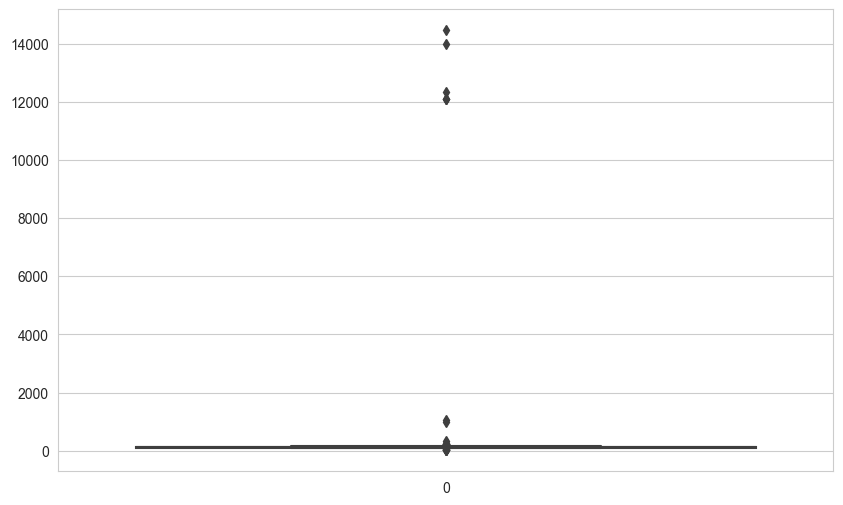

In [57]:
sns.boxplot(df.co2e_g);

In [58]:
from scipy.stats.mstats import winsorize

In [59]:
Q1 = df.co2e_g.quantile(0.25)
Q3 = df.co2e_g.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [60]:
a = len(df.co2e_g[df.co2e_g < lower_limit])/len(df)
a

0.00043972611344933726

In [61]:
b = len(df.co2e_g[df.co2e_g>upper_limit])/len(df)
b

0.0155160500031409

In [62]:
winsorize(df.co2e_g, (a, b))

masked_array(data=[ 99., 129.,  99., ..., 139., 139., 153.],
             mask=False,
       fill_value=1e+20)

In [63]:
table_win = winsorize(df.co2e_g, (a,b))
table_win

masked_array(data=[ 99., 129.,  99., ..., 139., 139., 153.],
             mask=False,
       fill_value=1e+20)

In [64]:
table_win_ser = pd.Series(table_win)
table_win_ser

0        99.000
1       129.000
2        99.000
3        99.000
4       109.000
          ...  
15914   139.000
15915   164.000
15916   139.000
15917   139.000
15918   153.000
Length: 15919, dtype: float64

In [65]:
df.co2e_g = table_win_ser

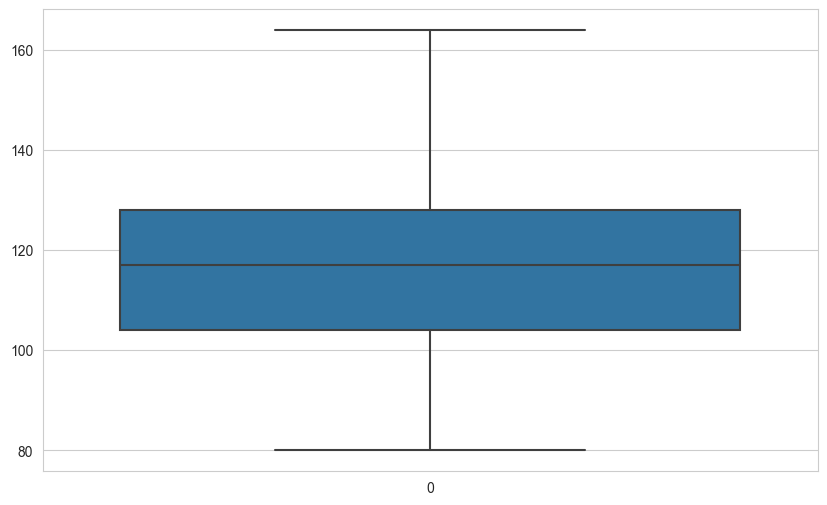

In [66]:
sns.boxplot(df.co2e_g);

# **12.gears**

In [67]:
detect_outlier("gears")

column name :  gears
----------------------------------------
Q1 :  5.0
Q3 :  6.0
IQR :  1.0
lower limit :  3.5
mean        :  5.94
upper limit :  7.5
count of lower values :  6
count of upper values :  300
 
the smallest 10 values :
 14375   1.000
8921    1.000
9812    2.000
15817   3.000
15845   3.000
15846   3.000
15823   4.000
15822   4.000
10287   5.000
10288   5.000
Name: gears, dtype: float64
 
the biggest 10 values :
 14495   50.000
15830    9.000
15827    9.000
15876    9.000
15814    9.000
15813    9.000
15812    9.000
15869    9.000
15824    9.000
15829    9.000
Name: gears, dtype: float64





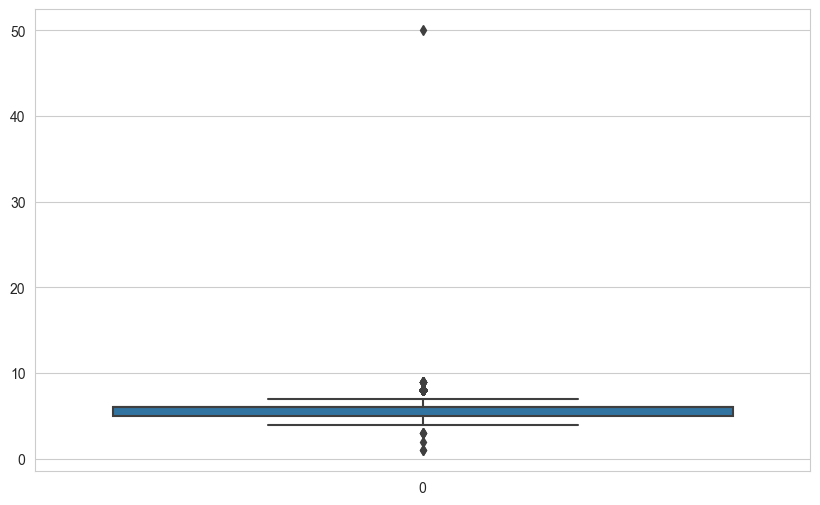

In [68]:
sns.boxplot(df.gears);

In [69]:
df.loc[df.gears == 50, "gears"] = 5

In [70]:
df.loc[df.gears <= 4, "gears"] = np.nan

In [71]:
df["gears"] = df.groupby(["make", "model", "body_type"])["gears"].apply(lambda x : x.fillna(x.mode()[0]))

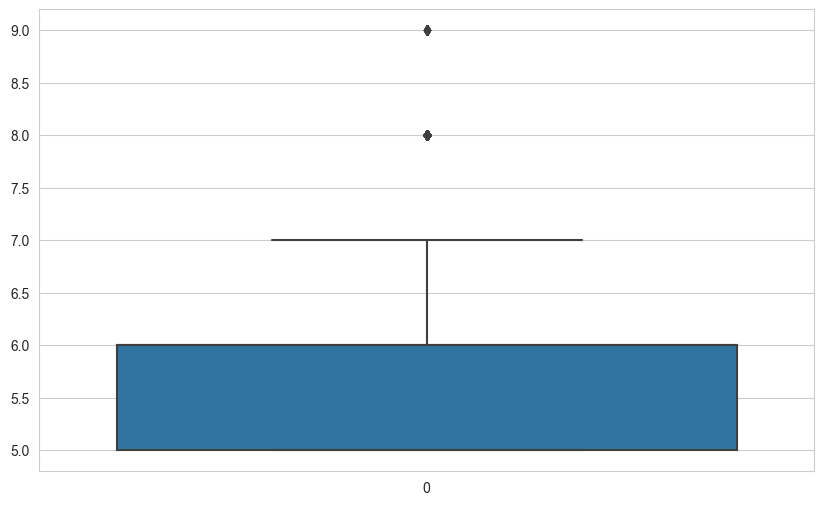

In [72]:
sns.boxplot(df.gears);

# **13.consumption_comb**

In [73]:
df.drop(columns=["consumption_city", "consumption_country"], inplace=True)

In [74]:
detect_outlier("consumption_comb")

column name :  consumption_comb
----------------------------------------
Q1 :  4.1
Q3 :  5.4
IQR :  1.3000000000000007
lower limit :  2.1499999999999986
mean        :  4.83
upper limit :  7.350000000000001
count of lower values :  4
count of upper values :  130
 
the smallest 10 values :
 13678   1.200
3615    1.600
3617    1.600
3612    1.600
8872    3.100
8904    3.100
8874    3.100
8566    3.100
8912    3.100
13680   3.100
Name: consumption_comb, dtype: float64
 
the biggest 10 values :
 535     13.800
10513    9.714
10771    9.100
12529    8.700
10817    8.700
10819    8.700
12054    8.700
12530    8.600
10789    8.600
12422    8.600
Name: consumption_comb, dtype: float64





In [75]:
df.iloc[[13678, 3615, 3617, 3612, 535, 10513, 10771]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,age
13678,Off-Road,7700.000,VAT deductible,95000.000,55.000,Used,1.000,1.000,Renault,Clio,White,Metallic,Cloth,5.000,5.000,Manual,1.500,4.000,1162.000,front,Diesel,85.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Digital radio,Hands-free e...","Catalytic Converter,Sport package,Sport seats,...","ABS,Adaptive Cruise Control,Alarm system,Centr...",5.000,Italy,1.200,3.000
3615,Sedans,35899.000,VAT deductible,20880.000,110.000,Used,1.000,0.000,Audi,A3,White,Metallic,Part leather,5.000,5.000,Semi-automatic,1.400,4.000,1615.000,front,Electric,80.000,Euro 6,"Air conditioning,Power windows,Seat ventilatio...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,Unknown,1.600,1.000
3617,Sedans,38000.000,Price negotiable,12000.000,110.000,Used,1.000,0.000,Audi,A3,Grey,Metallic,Part leather,5.000,5.000,Semi-automatic,1.400,4.000,1615.000,front,Electric,80.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,Unknown,1.600,1.000
3612,Sedans,38450.000,Price negotiable,13800.000,110.000,Used,1.000,0.000,Audi,A3,Black,Metallic,Cloth,5.000,5.000,Semi-automatic,1.400,4.000,1615.000,front,Electric,80.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport package,Sport seats,Voice C...","ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,Unknown,1.600,1.000
535,Compact,12990.000,VAT deductible,41200.000,70.000,Used,1.000,0.000,Audi,A1,Silver,Metallic,Cloth,5.000,5.000,Manual,1.000,8.000,1180.000,front,Benzine,164.000,Euro 4,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Ski bag,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",5.000,Unknown,13.800,3.000
10513,Station wagon,17990.000,VAT deductible,145000.000,239.000,Used,1.000,0.000,Opel,Insignia,Red,Metallic,Full leather,4.000,5.000,Automatic,1.600,4.000,1623.000,4WD,Benzine,164.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Shift paddles,Sport pac...","ABS,Adaptive Cruise Control,Blind spot monitor...",6.000,Germany,9.714,3.000
10771,Station wagon,12000.000,Price negotiable,185000.000,100.000,Used,1.000,0.000,Opel,Insignia,White,Metallic,Cloth,5.000,5.000,Automatic,3.000,6.000,2295.000,front,Diesel,164.000,Euro 4,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Roof rack,Ski...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,Unknown,9.100,3.000


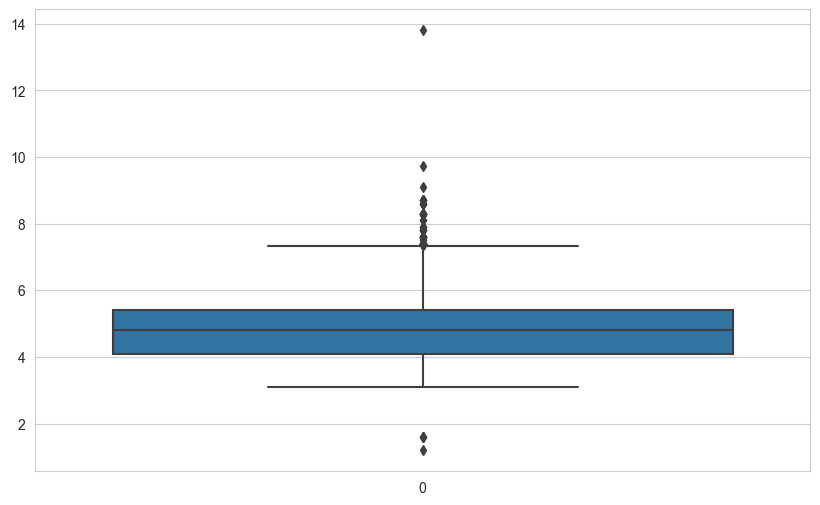

In [76]:
sns.boxplot(df.consumption_comb);

In [77]:
df.groupby(["make", "model", "body_type"])["consumption_comb"].median()

make     model     body_type    
Audi     A1        Compact         4.400
                   Coupe           3.802
                   Other           4.800
                   Sedans          4.200
                   Station wagon   4.200
                   Van             5.074
         A2        Off-Road        4.900
         A3        Compact         4.100
                   Convertible     4.800
                   Coupe           3.900
                   Other           4.150
                   Sedans          4.032
                   Station wagon   4.500
Opel     Astra     Compact         4.300
                   Coupe           6.200
                   Off-Road        5.600
                   Other           4.294
                   Sedans          4.800
                   Station wagon   4.500
         Corsa     Compact         5.600
                   Coupe           5.300
                   Off-Road        5.200
                   Other           5.200
                   Sedan

In [78]:
df.consumption_comb.iloc[[13678]] = 3.35

In [79]:
df.consumption_comb.iloc[[535]] = 4.400

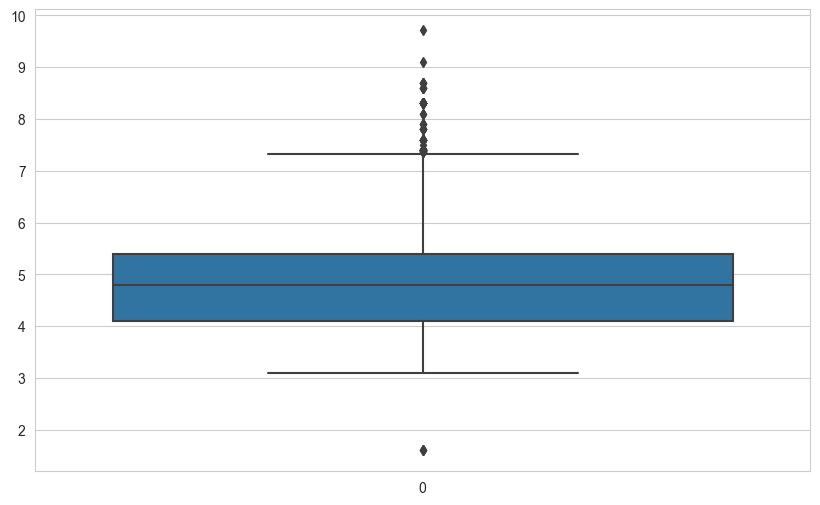

In [80]:
sns.boxplot(df.consumption_comb);

# **14.age**

In [81]:
detect_outlier("age")

column name :  age
----------------------------------------
Q1 :  0.0
Q3 :  2.0
IQR :  2.0
lower limit :  -3.0
mean        :  1.39
upper limit :  5.0
count of lower values :  0
count of upper values :  0
 
the smallest 10 values :
 7959   0.000
7936   0.000
7935   0.000
7934   0.000
7933   0.000
7932   0.000
7931   0.000
7930   0.000
7929   0.000
7928   0.000
Name: age, dtype: float64
 
the biggest 10 values :
 0      3.000
5938   3.000
5955   3.000
5954   3.000
5953   3.000
5952   3.000
5950   3.000
5949   3.000
5947   3.000
5940   3.000
Name: age, dtype: float64





In [82]:
import re 

def get_diff_category_column(Series:pd.Series, exclude=''',/\n''', pattern=r'''[,\n]| /''', strip='''' "!?|.,*+-_/][''', diff_value=list()):  
    diff_value.clear()
    column = Series.dropna().apply(str).str.strip(strip)
    for row in column:
        if not any(x in exclude for x in row) and row not in diff_value:
            diff_value.append(row)
        else:
            for data in map(lambda x: x.strip(strip), filter(None, re.split(pattern, row))):
                if data not in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [83]:
col_o = ['body_type','vat','type', 'previous_owners',
       'warranty', 'make', 'model', 'body_color', 'paint_type', 'upholstery',
       'gearing_type',
       'drive_chain', 'fuel', 
       'emission_class', 'comfort&convenience', 'entertainment&media',
       'extras', 'safety&security', 'country_version']

In [84]:
def control_outlier(col) :
    print("column name : ",col)
    print("--"*20)
    print(get_diff_category_column(df[col]))
    print("**"*40)
    
    print("\n\n")

In [85]:
for col in col_o:
    control_outlier(col)

column name :  body_type
----------------------------------------
{0: 'Compact', 1: 'Convertible', 2: 'Coupe', 3: 'Off-Road', 4: 'Other', 5: 'Sedans', 6: 'Station wagon', 7: 'Transporter', 8: 'Van'}
********************************************************************************



column name :  vat
----------------------------------------
{0: 'Price negotiable', 1: 'VAT deductible'}
********************************************************************************



column name :  type
----------------------------------------
{0: 'Demonstration', 1: "Employee's car", 2: 'New', 3: 'Pre-registered', 4: 'Used'}
********************************************************************************



column name :  previous_owners
----------------------------------------
{0: '0.0', 1: '1.0', 2: '2.0', 3: '3.0', 4: '4.0'}
********************************************************************************



column name :  warranty
----------------------------------------
{0: '0.0', 1: '1.0'}
******

#HEATMAP

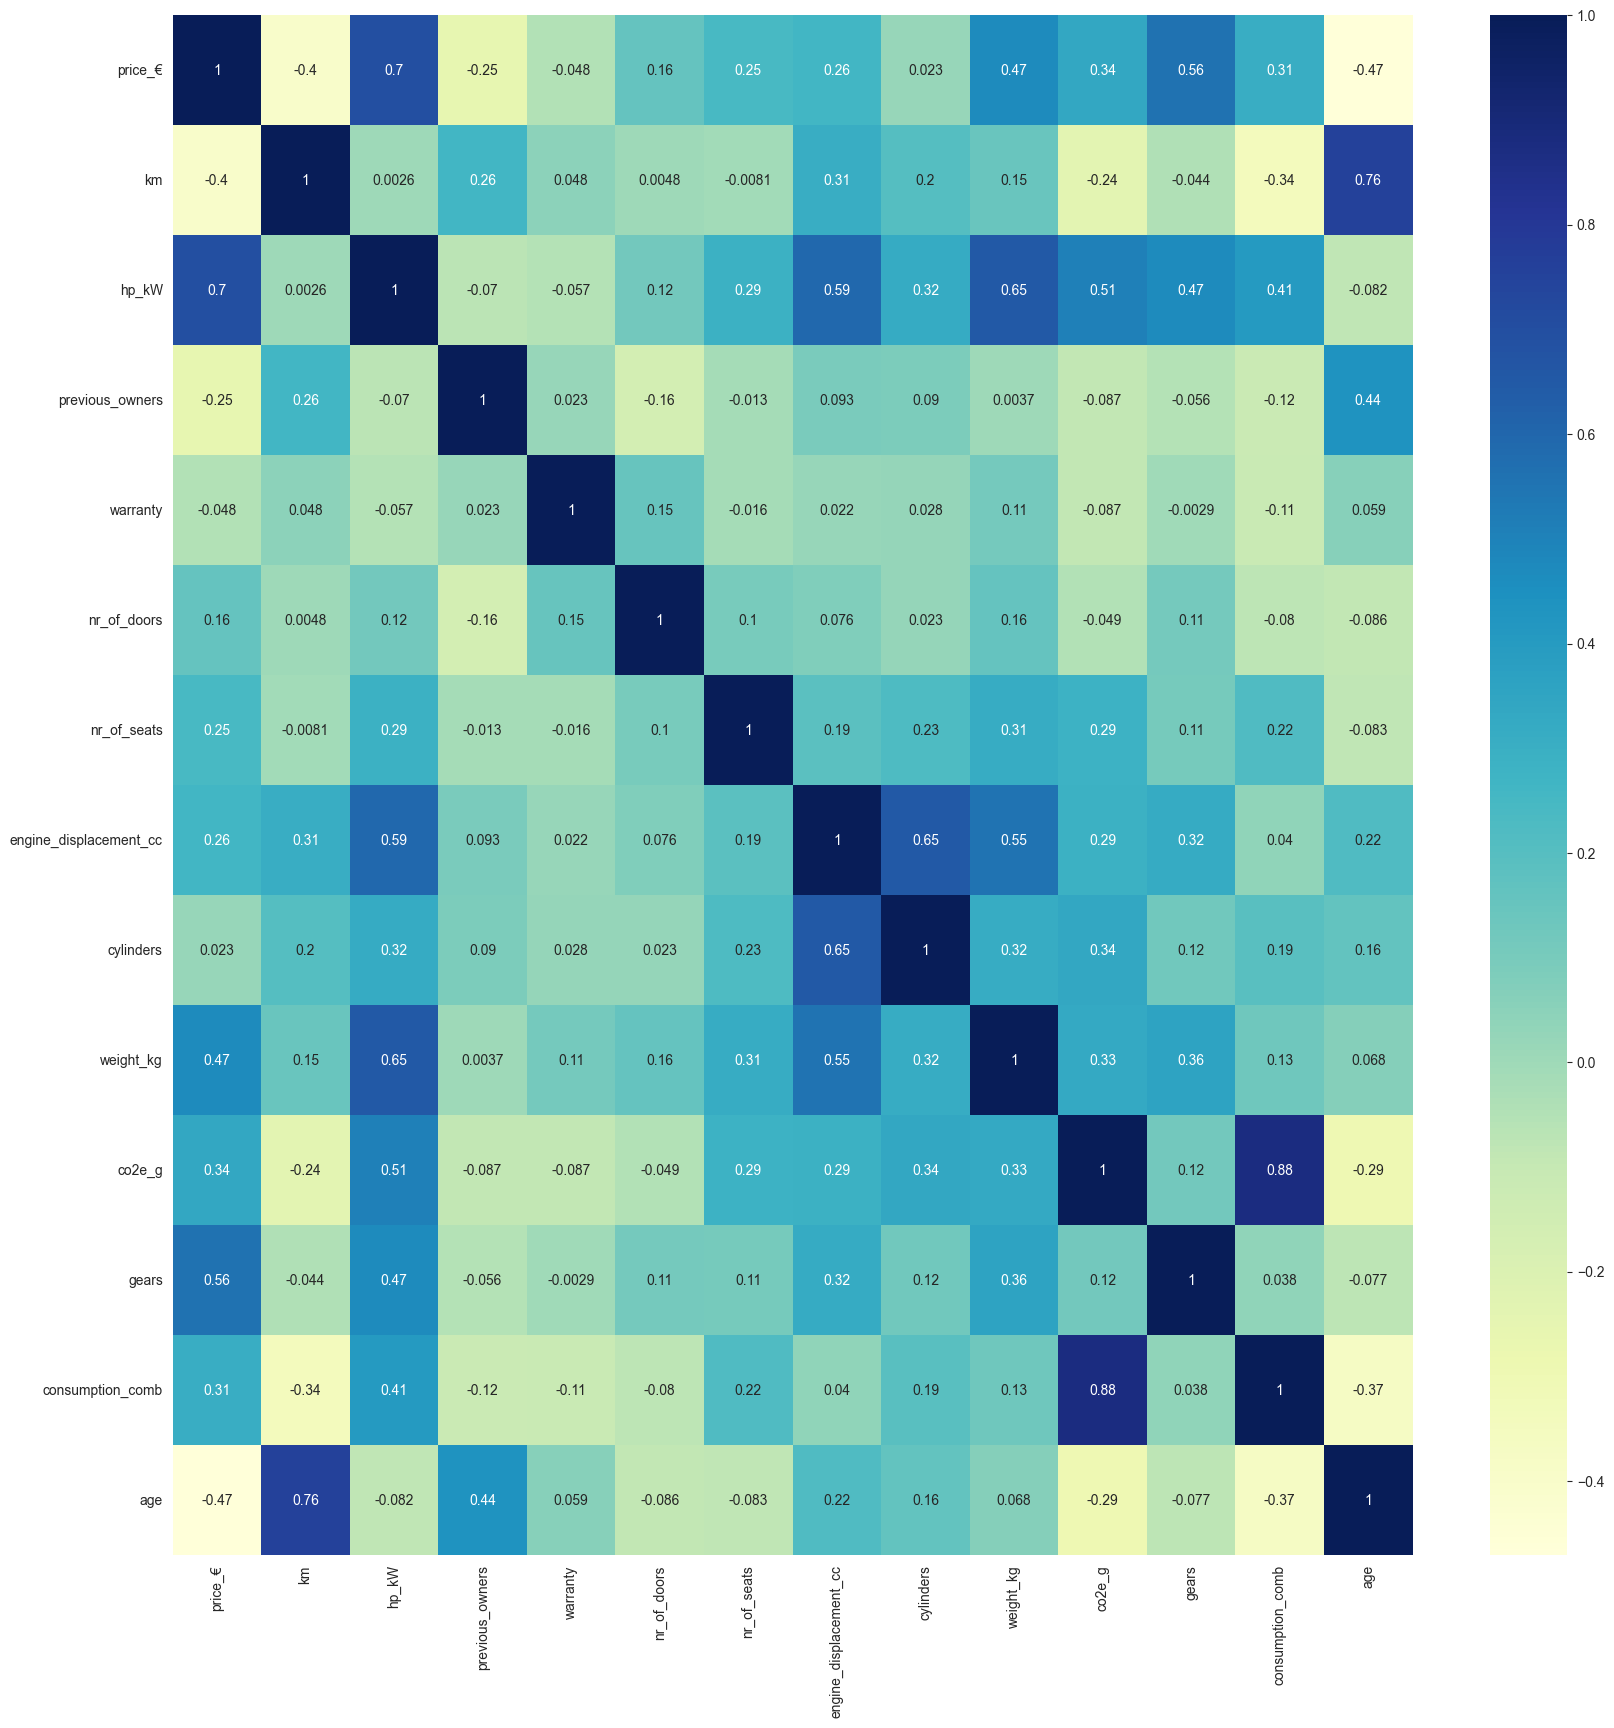

In [86]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");

In [87]:
# function for set text color of correlation values in Dataframes

def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color
 
df.corr().style.applymap(color_correlation)

,price_€,km,hp_kW,previous_owners,warranty,nr_of_doors,nr_of_seats,engine_displacement_cc,cylinders,weight_kg,co2e_g,gears,consumption_comb,age
price_€,1.000000,-0.400627,0.696937,-0.253994,-0.047982,0.159025,0.247030,0.261286,0.022809,0.468172,0.339304,0.559999,0.306526,-0.470765
km,-0.400627,1.000000,0.002637,0.258890,0.047595,0.004757,-0.008081,0.305780,0.202984,0.149312,-0.236089,-0.044206,-0.340634,0.758028
hp_kW,0.696937,0.002637,1.000000,-0.069540,-0.056614,0.120733,0.288218,0.593837,0.319994,0.652429,0.509540,0.467074,0.406405,-0.082438
previous_owners,-0.253994,0.258890,-0.069540,1.000000,0.022611,-0.158211,-0.013269,0.093219,0.090462,0.003686,-0.087432,-0.055578,-0.118234,0.437801
warranty,-0.047982,0.047595,-0.056614,0.022611,1.000000,0.150706,-0.015712,0.021557,0.028170,0.112641,-0.086831,-0.002884,-0.112362,0.059031
nr_of_doors,0.159025,0.004757,0.120733,-0.158211,0.150706,1.000000,0.101300,0.076310,0.023382,0.156417,-0.048663,0.112441,-0.079525,-0.085975
nr_of_seats,0.247030,-0.008081,0.288218,-0.013269,-0.015712,0.101300,1.000000,0.189391,0.228815,0.312101,0.285927,0.105279,0.218757,-0.083203
engine_displacement_cc,0.261286,0.305780,0.593837,0.093219,0.021557,0.076310,0.189391,1.000000,0.651058,0.554616,0.289301,0.318186,0.040133,0.219415
cylinders,0.022809,0.202984,0.319994,0.090462,0.028170,0.023382,0.228815,0.651058,1.000000,0.315445,0.337923,0.121979,0.194950,0.163069
weight_kg,0.468172,0.149312,0.652429,0.003686,0.112641,0.156417,0.312101,0.554616,0.315445,1.000000,0.328968,0.360638,0.127520,0.068005


In [88]:
df["make_model"] = df["make"] + " " + df["model"]

In [89]:
df.drop(columns=["make", "model"], inplace=True)

In [93]:
df[df.make_model == "Audi A2"]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,age,make_model
2614,Off-Road,28200.000,VAT deductible,26166.000,85.000,Employee's car,1.000,0.000,Grey,Metallic,Cloth,5.000,5.000,Manual,1.600,4.000,1288.000,front,Diesel,116.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",7.000,Germany,4.900,1.000,Audi A2


In [96]:
df.drop(index=[2614], inplace=True)

In [90]:
df.to_csv("without_outliers_autoscout.csv", index=False)

In [91]:
# The end's of handling with outliers.